# Twitter Sentiment Analysis

### Summary

Using tweepy API as well as vaderSentiment, I extracted 100 of the most recent tweets of various news organizations and performed a sentiment analysis of each tweet, composing of postive, negative, and neutral sentiments. 

With this information, I created a scatter plot that visualized the tweets that were sent out. Each plot point in the scatter diagram represents the compound sentiment of a tweet. I have also created a bar plot that shows the overall aggregated seniments of the last 100 tweets for each news organization. The news organizations I extracted tweets from included BBC, CBS, CNN, Fox and New York Times.



### Results and Analysis

Based on the data collected, I was able to find that many of the news organization has neutral sentiment. However, these news organizations also had positive and negative sentiment polarity:

1. When averaging out the total overall sentiment, FoxTV shows the highest positive sentiment while BBC shows the highest negative sentiment in their Tweets. 

2. Based on the scatter diagram that consists of 100 tweets for each news organization, FoxTV has the least negative sentiment. 

3. The scatter diagram shows that NY Times seems to have the least volatility in their sentiment analysis. Most of the tweet polarity is visualized in one row. NY Times has their polarity results at -0.15. 


Limitations of the data may include,the small sample size. Furthermore, variables such as the media's differing internal structures, as well as employees who manage the twitter page differ across news organizations. News anchors may present their information differently than those whom manage and post the news content on twitter. 

In [112]:
#import dependencies

import pandas as pd
import requests
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from pprint import pprint
import numpy as np

from datetime import datetime

from localenv import access_token , access_token_secret, \
                        consumer_key , consumer_secret
    

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [113]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth,parser=tweepy.parsers.JSONParser())

In [114]:
# BBC, CBS, CNN, Fox, New York times

target_users=("@BBC", "@CBS", "@CNN", "@FoxTV", "@NYTimes")

#array to hold sentiments
sentiment_array=[]
compound_overall=[]


# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

sentiment_list=""

#create a for loop for each news channel
for target in target_users:
    counter=0
    oldest_tweet=None
   
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    #make two requests of 50 tweets each
    for x in range(2):
        public_tweets=api.search(
            target,count=50,result_type="recent",max_id=oldest_tweet)    
        for tweet in public_tweets["statuses"]:
            counter = counter + 1
            results = analyzer.polarity_scores(tweet['text'])
            compound=results["compound"]
            positive=results["pos"]
            negative=results["neg"]
            neutral=results["neu"]
            rawtime=tweet["created_at"]
            converted_time=datetime.strptime(rawtime,"%a %b %d %H:%M:%S %z %Y")
            
            
            sentiment_array.append({
                "Users":target,
                "Compound List": compound,
                "Number Tweets Ago":counter,
                "Positive List": positive,
                "Negative List": negative,
                "Neutral List": neutral,
                "Tweet Time":converted_time
            })
            
            
        compound_mean=np.mean(compound)
            
        compound_overall.append({
            "Users":target,
            "Overall Sentiment":compound_mean})
        

        oldest_tweet=int(tweet["id_str"]) -1
     
    
    

In [121]:
sentiment_df=pd.DataFrame.from_dict(sentiment_array)
sentiment_df.head()

sentiment_df.to_csv("tweet_sentiment_csv",index=False)


In [116]:
overall_sentiment_df = pd.DataFrame(compound_overall)
total_overall_senti= overall_sentiment_df.groupby("Users")["Overall Sentiment"].mean().reset_index()

total_overall_senti.to_csv("overall_sentiment_csv",index=False)
total_overall_senti



,Users,Overall Sentiment
0,@BBC,-0.80200
1,@CBS,-0.00835
2,@CNN,0.36755
3,@FoxTV,0.39625
4,@NYTimes,-0.38275


In [117]:
bbc_senti = total_overall_senti["Overall Sentiment"][0]
cbs_senti = total_overall_senti["Overall Sentiment"][1]
cnn_senti = total_overall_senti["Overall Sentiment"][2]
fox_senti = total_overall_senti["Overall Sentiment"][3]
nyt_senti = total_overall_senti["Overall Sentiment"][4]

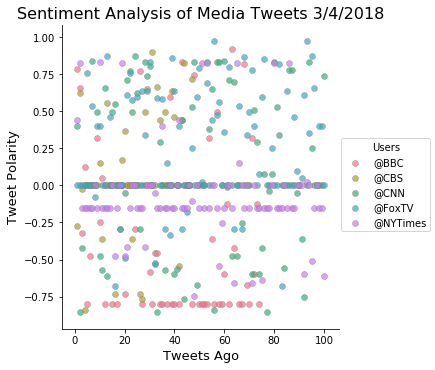

In [118]:
sns.lmplot(x="Number Tweets Ago", y="Compound List", data=sentiment_df, 
           fit_reg=False, hue="Users", palette="husl",
           legend=True,
           scatter_kws={
               "edgecolor":"grey",
               "linewidth":0.5,
               "alpha":0.7
           })

plt.title("Sentiment Analysis of Media Tweets 3/4/2018", size=16)
plt.ylabel("Tweet Polarity", size=13)
plt.xlabel("Tweets Ago", size=13)

plt.savefig("sentimentfig")

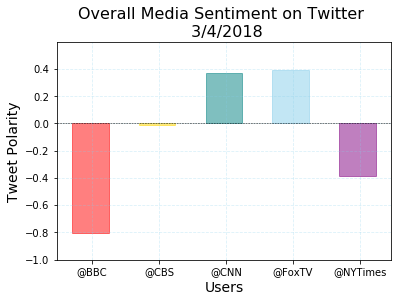

In [119]:
xvalues = total_overall_senti["Users"]
x_axis = np.arange(0,len(xvalues),1)
y_axis = total_overall_senti["Overall Sentiment"]
#y_axis = [bbc_senti,cbs_senti,cnn_senti,fox_senti,nyt_senti]


width=0.55

fig, ax = plt.subplots()

rects1 = ax.bar(x_axis, y_axis, width, color="pink", alpha=0.5)
rects1[0].set_color("red")
rects1[1].set_color("gold")
rects1[2].set_color("teal")
rects1[3].set_color("skyblue")
rects1[4].set_color("purple")

ax.set_xticks(x_axis+width/20)
ax.set_xticklabels(xvalues)
ax.axhline(y=0, linestyle="dashed", color="black",linewidth=0.5)
ax.set_title("Overall Media Sentiment on Twitter \n 3/4/2018", size = 16)
plt.ylim((min(y_axis) - .2) , (max(y_axis)+ .2))
plt.xlabel("Users", size = 14)
plt.ylabel("Tweet Polarity", size = 14)
plt.grid(linestyle="dashed",color="skyblue",alpha=0.3)




plt.savefig("overallsentiment")